In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [15]:
target_column = df.columns[-1]  # Assuming last column is the target
print(f"Target Column: {target_column}")

Target Column: species


In [17]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
best_k = 5  
knn_euclidean = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)

In [27]:
knn_manhattan = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn_manhattan.fit(X_train, y_train)  
y_pred_manhattan = knn_manhattan.predict(X_test)

In [29]:
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Accuracy with Euclidean Distance: {accuracy_euclidean:.2f}")
print(f"Accuracy with Manhattan Distance: {accuracy_manhattan:.2f}")


Accuracy with Euclidean Distance: 1.00
Accuracy with Manhattan Distance: 1.00


In [33]:
metrics = ["Euclidean", "Manhattan"]
accuracies = [accuracy_euclidean, accuracy_manhattan]

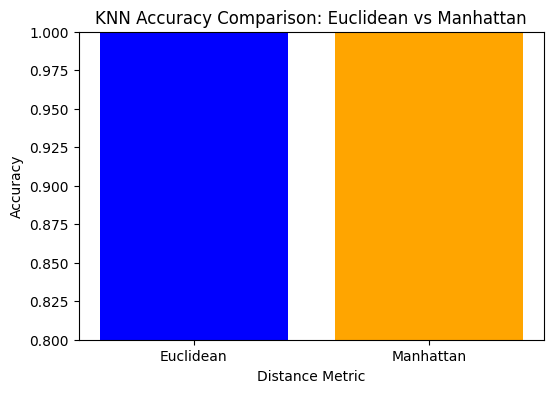

In [35]:
plt.figure(figsize=(6, 4))
plt.bar(metrics, accuracies, color=['blue', 'orange'])
plt.xlabel("Distance Metric")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy Comparison: Euclidean vs Manhattan")
plt.ylim(0.8, 1) 
plt.show()